# t-SNE

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import cm
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
#INSERT YOUR DECODER OUTPUT PATHS HERE

baseline_results = "/content/drive/MyDrive/emo_vec_dump.zip"
our_results = "content/drive/MyDrive/11-785/tsne_correct.zip"

#takes about 3 mins
!unzip /content/drive/MyDrive/emo_vec_dump.zip -d /content/data_baseline # (baseline) use only for alpha =1 as others are wrong
!unzip /content/drive/MyDrive/11-785/tsne_correct.zip -d /content/data # (ours) use for alpha!=1 

Archive:  /content/drive/MyDrive/emo_vec_dump.zip
  inflating: /content/data_baseline/for_tsne/hubert_alpha_0.5_down_sample_035_layer_L12_reps_ds_spkr/train.pkl  
  inflating: /content/data_baseline/for_tsne/hubert_alpha_0.5_down_sample_035_layer_L2_reps_ds_spkr/train.pkl  
  inflating: /content/data_baseline/for_tsne/hubert_alpha_1_down_sample_035_layer_L12_reps_ds_spkr/train.pkl  
  inflating: /content/data_baseline/for_tsne/hubert_alpha_1_down_sample_035_layer_L2_reps_ds_spkr/train.pkl  
Archive:  /content/drive/MyDrive/11-785/tsne_correct.zip
   creating: /content/data/emo_clustered_w_avg/for_tsne/
   creating: /content/data/emo_clustered_w_avg/for_tsne/hubert_alpha_0.5_down_sample_01_layer_L12_reps_ds_spkr/
  inflating: /content/data/emo_clustered_w_avg/for_tsne/hubert_alpha_0.5_down_sample_01_layer_L12_reps_ds_spkr/train.pkl  
   creating: /content/data/emo_clustered_w_avg/for_tsne/hubert_alpha_0.5_down_sample_01_layer_L6_reps_ds_spkr/
  inflating: /content/data/emo_clustered_w_a

In [ ]:
#load any 2 configurations from the data we just unzipped

layer_12_alpha_1 = np.load("/content/data_baseline/for_tsne/hubert_alpha_1_down_sample_035_layer_L12_reps_ds_spkr/train.pkl", allow_pickle=True)
layer_12_alpha_05 = np.load("/content/data/emo_clustered_w_avg/for_tsne/hubert_alpha_0.5_down_sample_01_layer_L12_reps_ds_spkr/train.pkl", allow_pickle=True)

In [ ]:
#preprocessing

def get_processed_data(data):
  
  classes = []
  data = [] 
  for i in range(len(layer_12_alpha_1)):
    
    item = layer_12_alpha_1[i]
    if(item[0].split("/")[1]!="0018"):
      continue
    classs = item[0].split("/")[2]
    
    emo_vec = item[1] # for seq
    emo_vec = np.squeeze(np.concatenate(emo_vec).reshape(-1,1)[:20000]) #for seq
    
    classes.append(classs)
    #emo_vec = item[2]
    data.append(emo_vec)
    
  UNIQUE_CLASSES = list(set(classes))
  
  mapp = {}
  for i in range(len(UNIQUE_CLASSES)):
    mapp[UNIQUE_CLASSES[i]] = i

  classes_ind = np.array(list(map(mapp.get, classes)))
  return data, classes_ind, UNIQUE_CLASSES, mapp

In [ ]:
def plot(projections, num_categories, class_indices, label_map):
  
  cmap = cm.get_cmap('tab20')
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

  for lab in range(num_categories):
      indices_1 = class_indices[0]==lab
      indices_2 = class_indices[1]==lab
      ax1.scatter(projections[0][indices_1,0],projections[0][indices_1,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
      ax2.scatter(projections[1][indices_2,0],projections[1][indices_2,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)

  ax1.set_title("Baseline")
  ax2.set_title("Ours")
  ax1.legend(fontsize='large', markerscale=2, labels=label_map)
  ax2.legend(fontsize='large', markerscale=2, labels=label_map)

  plt.show()

### Plot basleline vs ours

In [ ]:
data, classes_ind, UNIQUE_CLASSES, label_map = get_processed_data(layer_12_alpha_1)
data2, classes_ind2, UNIQUE_CLASSES2, label_map2 = get_processed_data(layer_12_alpha_05)

In [ ]:
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(np.array(data))

tsne2 = TSNE(2, verbose=1)
tsne_proj2 = tsne2.fit_transform(np.array(data2))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.032s...
[t-SNE] Computed neighbors for 1500 samples in 3.438s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.000010
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.880989
[t-SNE] KL divergence after 1000 iterations: 0.895754
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.045s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 1500 samples in 3.194s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.000010
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.886497
[t-SNE] KL divergence after 1000 iterations: 0.892320


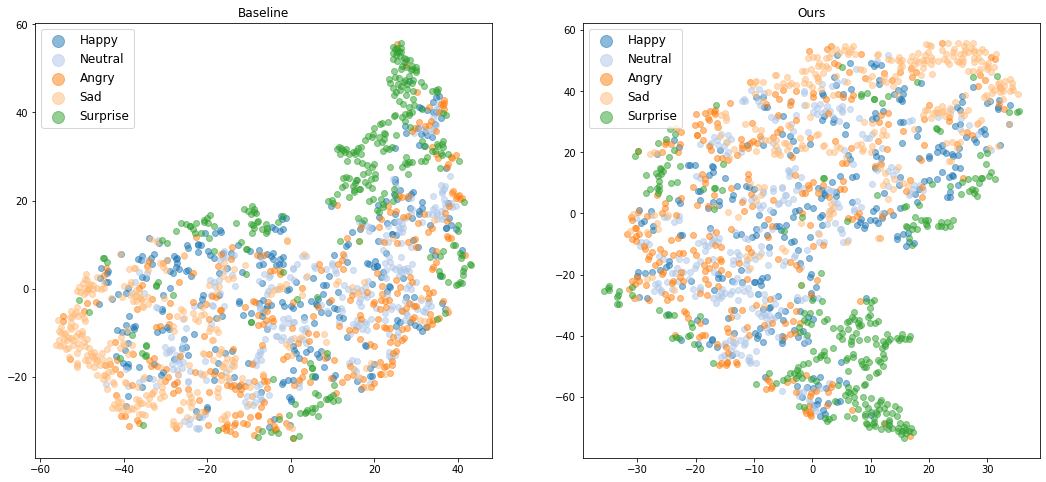

In [ ]:
plot([tsne_proj, tsne_proj2], len(UNIQUE_CLASSES), [classes_ind, classes_ind2], label_map)